In [3]:
import pandas as pd

data = pd.read_csv('../data/prostate.data.txt', delimiter='\t')

data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [14]:
X = data[data.columns[:-2]].values
y = data[data.columns[-2]].values

In [19]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)

In [20]:
std_X = std_scale.transform(X)

In [34]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(std_X , y , test_size = 0.25)

In [45]:
from sklearn import linear_model
import numpy as np

In [46]:
#Ordinary Least Squares
ordinary_regression = linear_model.LinearRegression()
ordinary_regression.fit(x_train , y_train)

LinearRegression()

In [47]:
baseline_error = np.mean((ordinary_regression.predict(x_test) - y_test) ** 2)

print(baseline_error)

0.17481450022112846


In [49]:
#Application de la régression ridge
ridge = linear_model.Ridge()

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(x_test) - y_test) ** 2)])

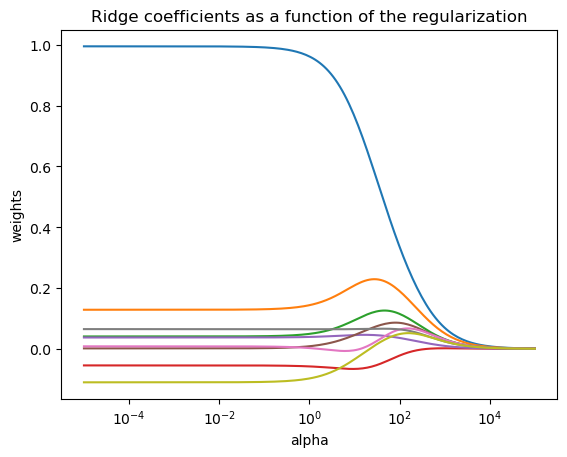

In [53]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

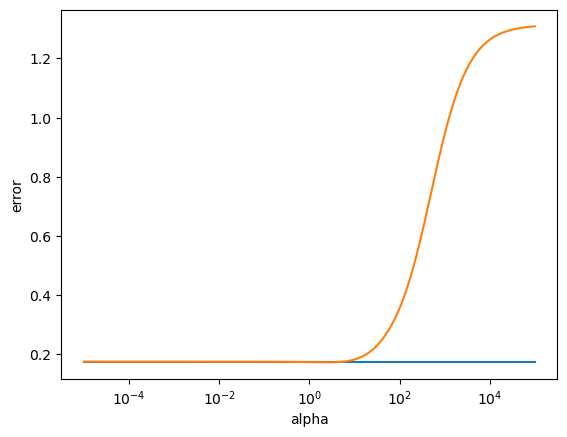

In [54]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [55]:
min(errors)

[0.17481450022112846, 0.1724562970519797]

In [57]:
#Application du Lasso
lasso = linear_model.Lasso(fit_intercept=False)

n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(x_test) - y_test) ** 2)])

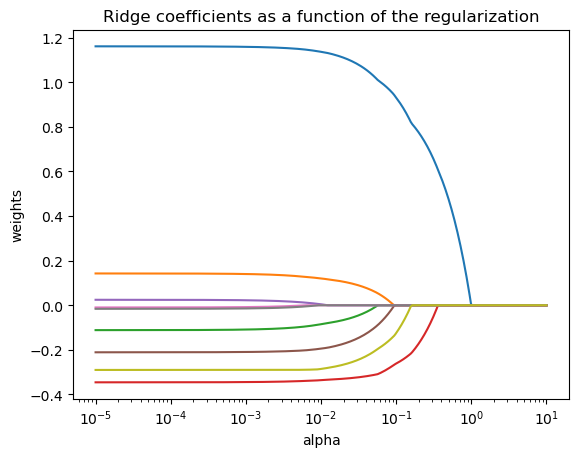

In [58]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

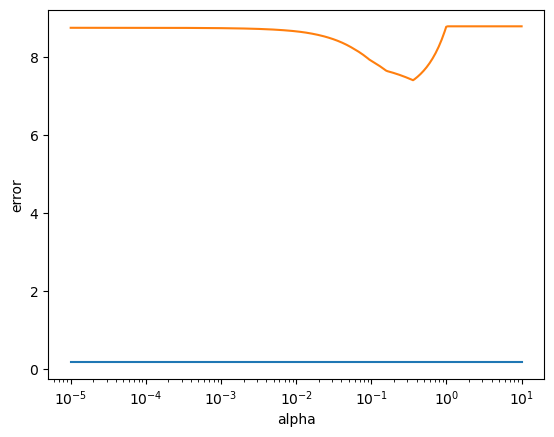

In [59]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [60]:
min(errors)

[0.17481450022112846, 7.396279698243943]

In [61]:
# Données d'observation
X_data = np.array([-0.78768, -1.51760513, 0.74416271, -0.62288928])
y_data = np.array([-34.59703199, -30.79543532, 19.31018182, -19.44809959])

# Ajouter une colonne de 1 pour l'intercept
X_matrix = np.column_stack((np.ones_like(X_data), X_data))

# Calculer le vecteur de paramètres optimal beta
beta_optimal = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_data

print("Vecteur de paramètres optimal beta :")
print(beta_optimal)


Vecteur de paramètres optimal beta :
[-3.16775325 24.20287954]
